In [75]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import sklearn.metrics
import matplotlib.pyplot as plt

import random

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from itertools import chain

from tqdm import trange

In [17]:
def threshold(df):
    df2 = df.copy()
    df2.loc[df2.Predictions < 0.5, 'Predictions'] = 0
    df2.loc[df2.Predictions >= 0.5, 'Predictions'] = 1
    return df2


def threshold(df, n_classes):
    df2 = df.copy()
    df2.loc[df2.Predictions <= -0.5, 'Predictions'] = 0
    df2.loc[df2.Predictions >= (n_classes - 1) + 0.5, 'Predictions'] = n_classes - 1
    for i in range(n_classes):
        df2.loc[(i - 0.5 < df2.Predictions) & (df2.Predictions <= i + 0.5), 'Predictions'] = i
    return df2

In [18]:
def prec_rec(df):
    TP = df.loc[(df.Predictions == 1) & (df.Labels == 1)].shape[0]
    TN = df.loc[(df.Predictions == 0) & (df.Labels == 0)].shape[0]
    FP = df.loc[(df.Predictions == 1) & (df.Labels == 0)].shape[0]
    FN = df.loc[(df.Predictions == 0) & (df.Labels == 1)].shape[0]
    
    try:
        precision_1 = (TP)/(TP + FP)
    except:
        precision_1 = 0
    try:
        recall_1 = (TP)/(TP + FN)
    except:
        recall_1 = 0
    
    precision_0 = (TN)/(TN + FN)
    recall_0 = (TN)/(TN + FP)
    
    return precision_0, recall_0, precision_1, recall_1, TP, TN, FP, FN

In [19]:
def get_accuracy(df):
    preds = df.Predictions
    targets = df.Labels
    results = (preds == targets)
    results = [1 if x == True else 0 for x in results]
    return sum(results)/len(results) * 100

In [20]:
def accuracy_hist(experiment, epochs, n_classes=2, start=0):
    accs = []
    if start == 0:
        df = pd.read_csv(f'plotting/{experiment}/{experiment}_epoch_{0}')
        df = threshold(df.loc[(df.Predictions < 0.3) | (df.Predictions > 0.7)], n_classes=n_classes)
        accs.append(get_accuracy(df))
    
    for k in range(5, epochs, 5):
        df = pd.read_csv(f'plotting/{experiment}/{experiment}_epoch_{k}')
        df = threshold(df.loc[(df.Predictions < 0.3) | (df.Predictions > 0.7)], n_classes=n_classes)
        accs.append(get_accuracy(df))
    
    return accs

# Graph predicted values vs targets

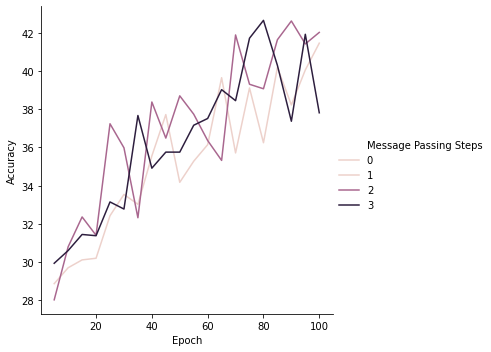

In [41]:
accs, mpnn_steps, epochs = [], [], []
for i in range(1,4):
    accs.extend(accuracy_hist(f'M2m{i}', epochs=101, n_classes=4, start=5))
    mpnn_steps.extend([i for j in range(5, 101, 5)])
    epochs.extend([j for j in range(5,101,5)])
    
df = pd.DataFrame(data={'Accuracy': accs, 'Message Passing Steps': mpnn_steps, 'Epoch': epochs})
sns.relplot(x="Epoch", y="Accuracy", hue="Message Passing Steps", kind="line", data=df)

In [94]:
experiment = 'M2u0'
df1 = pd.read_csv(f'plotting/{experiment}/{experiment}_epoch_30')
# df1 = threshold(df2, n_classes=4)

# x = sklearn.metrics.confusion_matrix(df1.Labels, df1.Predictions)
# print(x)

In [95]:
experiment = 'M2m0_2'
df2 = pd.read_csv(f'plotting/{experiment}/{experiment}_epoch_40')
# df2 = threshold(df2, n_classes=4)

# x = sklearn.metrics.confusion_matrix(df2.Labels, df2.Predictions)
# print(x)

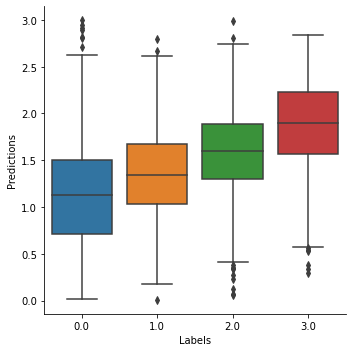

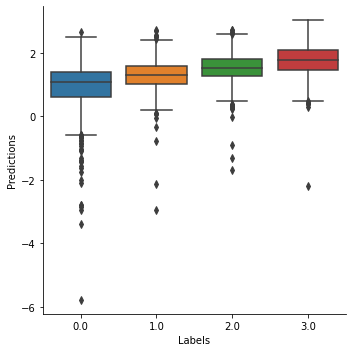

In [96]:
sns.catplot(x='Labels', y='Predictions', kind='box', data=df2)
sns.catplot(x='Labels', y='Predictions', kind='box', data=df1)

<AxesSubplot:xlabel='Labels', ylabel='Predictions'>

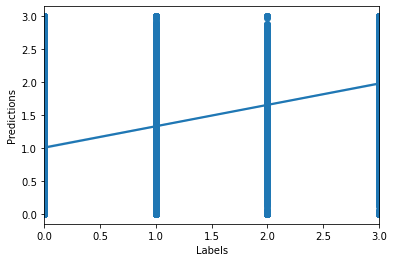

In [93]:
sns.regplot(x="Labels", y="Predictions", data=df)

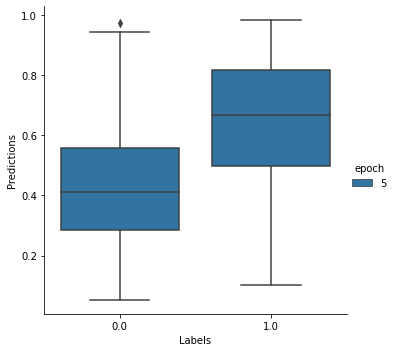

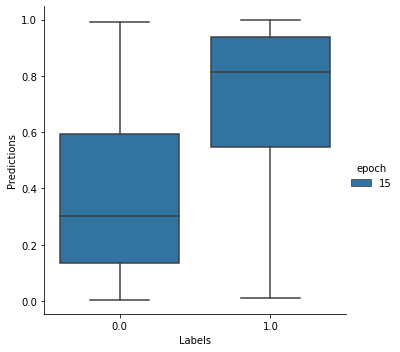

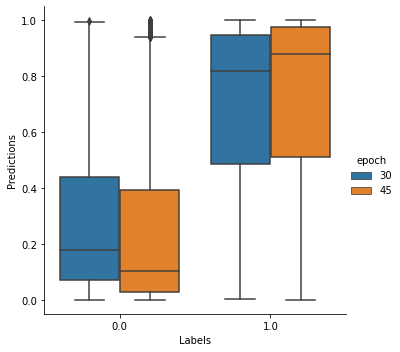

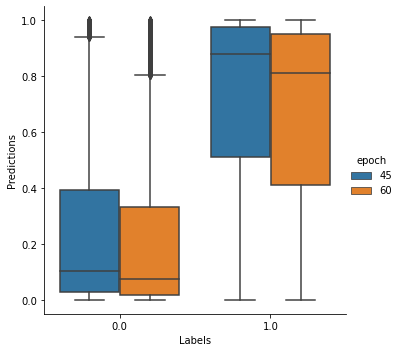

In [76]:
# df1 = pd.read_csv('plotting/pp_BSu_4_quicktest_epoch_4')
# df2 = pd.read_csv('plotting/pp_BSu_4_quicktest_epoch_9')
# df3 = pd.read_csv('plotting/pp_BSu_4_quicktest_epoch_19')
# df4 = pd.read_csv('plotting/pp_BSu_4_quicktest_epoch_29')
# df1['epoch'] = 5
# df2['epoch'] = 10
# df3['epoch'] = 20
# df4['epoch'] = 30

# df1 = pd.read_csv('plotting/BSu_4_revamped_again_b_epoch_5')
# df2 = pd.read_csv('plotting/BSu_4_revamped_again_b_epoch_10')
# df3 = pd.read_csv('plotting/BSu_4_revamped_again_b_epoch_20')
# df4 = pd.read_csv('plotting/BSu_4_revamped_again_b_epoch_30')
# df5 = pd.read_csv('plotting/BSu_4_revamped_again_b_epoch_150')

df1 = pd.read_csv('plotting/Bu0_2/Bu0_2_epoch_5')
df2 = pd.read_csv('plotting/Bu0_2/Bu0_2_epoch_15')
df3 = pd.read_csv('plotting/Bu0_2/Bu0_2_epoch_30')
df4 = pd.read_csv('plotting/Bu0_2/Bu0_2_epoch_45')
df5 = pd.read_csv('plotting/Bu0_2/Bu0_2_epoch_60')


rdf4 = df4.loc[(df4.Predictions < 0.3) | (df4.Predictions > 0.7)]
rdf5 = df5.loc[(df5.Predictions < 0.3) | (df5.Predictions > 0.7)]

# df1 = pd.read_csv('plotting/Bu_4_BSu_revamped_a_epoch_15')
# df2 = pd.read_csv('plotting/Bu_4_BSu_revamped_a_epoch_95')


df_low_epoch = pd.concat([df1, df2])
df_high_epoch = pd.concat([df3, df4])
df_higher_epochs = pd.concat([df4, df5])

sns.catplot(x='Labels', y='Predictions', hue='epoch', kind='box', data=df1)
sns.catplot(x='Labels', y='Predictions', hue='epoch', kind='box', data=df2)
sns.catplot(x='Labels', y='Predictions', hue='epoch', kind='box', data=df_high_epoch)
sns.catplot(x='Labels', y='Predictions', hue='epoch', kind='box', data=df_higher_epochs)

In [11]:
tdf1 = threshold(df1)
tdf2 = threshold(df2)
tdf3 = threshold(df3)
tdf4 = threshold(df4)
tdf5 = threshold(df5)
rdtf4 = threshold(rdf4)
rdtf5 = threshold(rdf5)

for tdf in [tdf1, tdf2, tdf3, tdf4, tdf5, rdtf4, rdtf5]:
    p0, r0, p1, r1, TP, TN, FP, FN = prec_rec(tdf)

    confusion_matrix = np.array([[TN, FN],[FP, TP]])
    print('Confusion Matrix:')
    print(confusion_matrix)
    print('\nLabel 0:')
    print(f'Precision: {p0}, Recall: {r0}')
    print('\nLabel 1:')
    print(f'Precision: {p1}, Recall: {r1}\n\n')
    
preds = tdf4.Predictions
targets = tdf4.Labels
results = (preds == targets)
results = [1 if x == True else 0 for x in results]
print(f'Accuracy: {sum(results)/len(results) * 100}')

Confusion Matrix:
[[3896 1519]
 [2032 4535]]

Label 0:
Precision: 0.7194829178208679, Recall: 0.6572199730094467

Label 1:
Precision: 0.6905740825338815, Recall: 0.7490915097456228


Confusion Matrix:
[[4048 1352]
 [1880 4702]]

Label 0:
Precision: 0.7496296296296296, Recall: 0.6828609986504723

Label 1:
Precision: 0.7143725311455484, Recall: 0.7766765774694417


Confusion Matrix:
[[4647 1564]
 [1281 4490]]

Label 0:
Precision: 0.7481886974722267, Recall: 0.7839068825910931

Label 1:
Precision: 0.7780280713914399, Recall: 0.7416584076643541


Confusion Matrix:
[[4700 1488]
 [1228 4566]]

Label 0:
Precision: 0.7595345830639948, Recall: 0.7928475033738192

Label 1:
Precision: 0.7880566102865033, Recall: 0.7542120911793855


Confusion Matrix:
[[4912 1753]
 [1016 4301]]

Label 0:
Precision: 0.7369842460615154, Recall: 0.8286099865047234

Label 1:
Precision: 0.8089148015798383, Recall: 0.7104393789230261


Confusion Matrix:
[[4160 1008]
 [ 770 3967]]

Label 0:
Precision: 0.804953560371517, 

In [3]:
df1 = pd.read_csv(f'plotting/classic: 0 hops/classic: 0 hops_epoch_30')

In [4]:
df1

,Unnamed: 0,Predictions,Labels,epoch
0,0,0,0,30
1,1,3,0,30
2,2,1,1,30
3,3,0,0,30
4,4,0,1,30
...,...,...,...,...
10784,10784,0,0,30
10785,10785,0,0,30
10786,10786,2,1,30
10787,10787,2,2,30


# Pearson Correlation Coefficient

In [68]:
def correlation(predictions, targets, target_mean, target_denomenator, prediction_mean=None):
    if not prediction_mean:
        prediction_mean = sum(predictions)/len(predictions)
    
    numerator = sum(((x - prediction_mean)*(y - target_mean) for x,y in zip(predictions, targets)))
    pred_denomenator = math.sqrt(sum((x - prediction_mean)**2 for x in predictions))
    denomenator = pred_denomenator * target_denomenator
    
    return numerator/denomenator

# Processing Experiment 1

In [40]:
def get_correlations(root_folder):
    target_mean = None
    target_denomenator = None
    
    for dataset in ['classic', 'classic+m', 'classic+a', 'classic+ma']:
        for hops in ['0', '3', '6', '9']:
            best_correlation = 0
            best_epoch = None
            best_acc = 0
            best_acc_epoch = None
            
            for epoch in range(0, 105, 5):
                if dataset == 'classic':
                    filename = f'{root_folder}/{dataset}+R: {hops} hops/{dataset}+R: {hops} hops_epoch_{epoch}'
                else:
                    filename = f'{root_folder}/{dataset}R: {hops} hops/{dataset}R: {hops} hops_epoch_{epoch}'
                df = pd.read_csv(filename)
                if not target_mean:
                    target_mean = sum(df.Labels)/len(df.Labels)
                    target_denomenator = math.sqrt(sum((y - target_mean)**2 for y in df.Labels))
                    
                cc = correlation(df.Predictions, df.Labels, target_mean, target_denomenator)
                acc = sum(df.Predictions == df.Labels)/len(df.Predictions)
                
                if abs(cc) > best_correlation:
                    best_correlation = abs(cc)
                    best_epoch = epoch
                    
                if acc > best_acc:
                    best_acc = acc
                    best_acc_epoch = epoch
            
            print(f'{dataset}, {hops} hops: {best_correlation:.3f} / {best_acc:.3f}')
            
            
            # Measure correlation significance
            if dataset == 'classic':
                filename = f'{root_folder}/{dataset}+R: {hops} hops/{dataset}+R: {hops} hops_epoch_{best_epoch}'
            else:
                filename = f'{root_folder}/{dataset}R: {hops} hops/{dataset}R: {hops} hops_epoch_{best_epoch}'
            df = pd.read_csv(filename)
            
            corrs = []
            labels_copy = np.array(df.Labels.copy())
            
            for i in trange(1000):
                np.random.shuffle(labels_copy)
                corrs.append(correlation(df.Predictions, labels_copy, target_mean, target_denomenator))
                
                
            significance_threshold = corrs[math.ceil(len(corrs)*0.975)]
            if best_correlation <= significance_threshold:
                print(f'{dataset}, {hops} hops: Correlation Not Significant')
                
            if best_correlation <= corrs[-1]:
                print(f'{dataset}, {hops} hops: Correlation Not Very Significant')
                
            
            # Measure Accuracy significance
            if dataset == 'classic':
                filename = f'{root_folder}/{dataset}+R: {hops} hops/{dataset}+R: {hops} hops_epoch_{best_acc_epoch}'
            else:
                filename = f'{root_folder}/{dataset}R: {hops} hops/{dataset}R: {hops} hops_epoch_{best_acc_epoch}'
            df = pd.read_csv(filename)
            
            accs = []
            labels_copy = np.array(df.Labels.copy())
            
            for i in trange(1000):
                np.random.shuffle(labels_copy)
                accs.append(sum(df.Predictions == labels_copy)/len(labels_copy))
                
            significance_threshold = accs[math.ceil(len(accs)*0.975)]
            if best_acc <= significance_threshold:
                print(f'{dataset}, {hops} hops: Correlation Not Significant')
                
            if best_acc <= accs[-1]:
                print(f'{dataset}, {hops} hops: Correlation Not Very Significant')
                
get_correlations('plotting_relative')

  0%|          | 4/1000 [00:00<00:28, 34.51it/s]

classic, 0 hops: 0.264 / 0.426


  0%|          | 4/1000 [00:00<00:32, 31.04it/s]

classic, 3 hops: 0.261 / 0.437


  0%|          | 4/1000 [00:00<00:28, 34.36it/s]

classic, 6 hops: 0.267 / 0.430


  0%|          | 3/1000 [00:00<00:33, 29.82it/s]

classic, 9 hops: 0.272 / 0.430


  0%|          | 4/1000 [00:00<00:32, 31.11it/s]

classic+m, 0 hops: 0.259 / 0.429


  0%|          | 4/1000 [00:00<00:29, 33.67it/s]

classic+m, 3 hops: 0.263 / 0.426


  0%|          | 4/1000 [00:00<00:30, 32.37it/s]

classic+m, 6 hops: 0.258 / 0.429


  0%|          | 4/1000 [00:00<00:31, 31.88it/s]

classic+m, 9 hops: 0.263 / 0.430


  0%|          | 3/1000 [00:00<00:33, 29.97it/s]

classic+a, 0 hops: 0.137 / 0.378


  0%|          | 4/1000 [00:00<00:31, 31.43it/s]

classic+a, 3 hops: 0.208 / 0.403


  0%|          | 4/1000 [00:00<00:31, 32.06it/s]

classic+a, 6 hops: 0.203 / 0.401


  0%|          | 4/1000 [00:00<00:30, 32.49it/s]

classic+a, 9 hops: 0.202 / 0.402


  0%|          | 3/1000 [00:00<00:33, 29.77it/s]

classic+ma, 0 hops: 0.143 / 0.377


  0%|          | 4/1000 [00:00<00:30, 32.71it/s]

classic+ma, 3 hops: 0.207 / 0.402


  0%|          | 4/1000 [00:00<00:29, 33.22it/s]

classic+ma, 6 hops: 0.201 / 0.402


  0%|          | 4/1000 [00:00<00:31, 31.50it/s]

classic+ma, 9 hops: 0.203 / 0.401


100%|██████████| 1000/1000 [00:01<00:00, 735.34it/s]


In [32]:
for filename in ['plotting_altered_classic/classic (with GCNConvs): 3 hops/classic (with GCNConvs): 3 hops',
                'plotting_altered_classic/classic (with max aggr): 3 hops/classic (with max aggr): 3 hops',
                'plotting_altered_classic/classic (with reduced MLPs): 3 hops/classic (with reduced MLPs): 3 hops']:
    best_cc = 0
    
    for epoch in range(0, 105, 5):
        df = pd.read_csv(filename + f'_epoch_{epoch}')
        target_mean = sum(df.Labels)/len(df.Labels)
        target_denomenator = math.sqrt(sum((y - target_mean)**2 for y in df.Labels))
        
        cc = correlation(df.Predictions, df.Labels, target_mean, target_denomenator)
        if abs(cc) > best_cc:
            best_cc = abs(cc)
    print(cc)

0.5349389168728819
0.635902829964673
0.6207180520640653


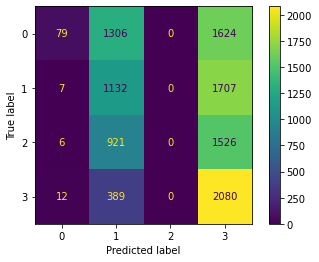

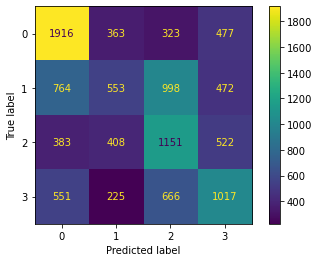

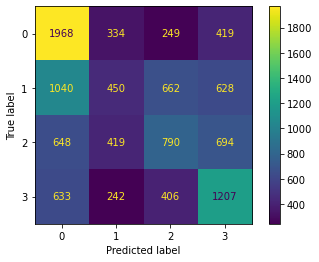

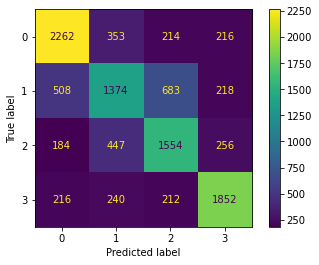

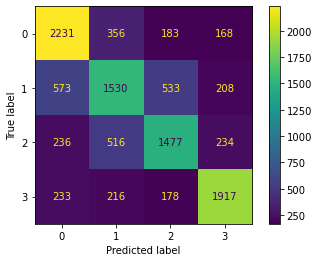

In [33]:
for filename in ['plotting_without_MLP_V/classic+A: 0 hops/classic+A: 0 hops',
                 'plotting_without_MLP_V/classic+A: 3 hops/classic+A: 3 hops',
                 'plotting_without_MLP_V/classic+MA: 3 hops/classic+MA: 3 hops',
                 'plotting_without_MLP_V/classic: 3 hops/classic: 3 hops',
                 'plotting_without_MLP_V/classic+M: 3 hops/classic+M: 3 hops'
                ]:
    
    best_cc = 0
    best_epoch = None
    
    for epoch in range(0, 105, 5):
        df = pd.read_csv(filename + f'_epoch_{epoch}')
        target_mean = sum(df.Labels)/len(df.Labels)
        target_denomenator = math.sqrt(sum((y - target_mean)**2 for y in df.Labels))
        
        cc = correlation(df.Predictions, df.Labels, target_mean, target_denomenator)
        if abs(cc) > best_cc:
            best_cc = abs(cc)
            best_epoch = epoch
    
    df = pd.read_csv(filename + f'_epoch_{best_epoch}')
    cm = confusion_matrix(df.Labels, df.Predictions, labels=[0,1,2,3])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=[0,1,2,3])
    disp.plot() 

# Testing significance of closeness to correct result in predictions

In [87]:
"""
Given a set of predictions, shuffle the incorrect ones and measure correlation. Perform 1000 times to generate p-value.
"""


def get_correlations(root_folder):
    target_mean = None
    target_denomenator = None
    
    for dataset in ['classic', 'classic+m', 'classic+a', 'classic+ma']:
        for hops in ['0', '3', '6', '9']:
            best_correlation = 0
            best_epoch = None
            best_acc = 0
            best_acc_epoch = None
            
            for epoch in range(0, 105, 5):

                filename = f'{root_folder}/{dataset}: {hops} hops/{dataset}: {hops} hops_epoch_{epoch}'
                df = pd.read_csv(filename)
#                 if not target_mean:
                
                    
#                 mismatched_values = [(x,y) for x,y in zip(df.Predictions, df.Labels) if x != y]
#                 wrong_preds = [b[0] for b in mismatched_values]
#                 wrong_labels = [b[1] for b in mismatched_values]
                
                target_mean = sum(df.Labels)/len(df.Labels)
                target_denomenator = math.sqrt(sum((y - target_mean)**2 for y in df.Labels))
                cc = correlation(df.Predictions, df.Labels, target_mean, target_denomenator)
                
                if abs(cc) > best_correlation:
                    best_correlation = abs(cc)
                    best_epoch = epoch
            
            
            
            
            
            # Measure correlation significance
            filename = f'{root_folder}/{dataset}: {hops} hops/{dataset}: {hops} hops_epoch_{best_epoch}'
            df = pd.read_csv(filename)
            
            
            # Take mismatched subset of predictions/labels
            wrong_values = [(x,y) for x,y in zip(df.Predictions, df.Labels) if x != y]
            wrong_preds, wrong_labels = [b[0] for b in wrong_values], [b[1] for b in wrong_values]

            
            target_mean = sum(wrong_labels)/len(wrong_labels)
            target_denomenator = math.sqrt(sum((y - target_mean)**2 for y in wrong_labels))
            
            cc = correlation(wrong_preds, wrong_labels, target_mean, target_denomenator)
            print(f'{dataset}, {hops} hops: {cc:.3f}')
            
            corrs = []
            wrong_labels_copy = np.array(wrong_labels.copy())
            for i in trange(1000):
#                 np.random.shuffle(wrong_labels_copy)
                wrong_labels_copy = [random.choice(list({0,1,2,3} - {x})) for x in wrong_preds]
                target_mean = sum(wrong_labels_copy)/len(wrong_labels_copy)
                target_denomenator = math.sqrt(sum((y - target_mean)**2 for y in wrong_labels_copy))
#                 labels = list(wrong_labels_copy) + list(right_labels)
                corrs.append(correlation(wrong_preds, wrong_labels_copy, target_mean, target_denomenator))
                
            
            corrs = sorted(corrs)
#             print(corrs)
            significance_threshold = corrs[math.ceil(len(corrs)*0.95)]
            if abs(cc) <= significance_threshold:
                print(f'{dataset}, {hops} hops: Correlation Not Significant')
                
            if abs(cc) <= corrs[-1]:
                print(f'{dataset}, {hops} hops: Correlation Not Very Significant')
                
            print(corrs[-1])
            print(significance_threshold)
                
            
                
get_correlations('plotting_without_MLP_V')

  2%|▎         | 25/1000 [00:00<00:03, 245.62it/s]

classic, 0 hops: -0.199


100%|██████████| 1000/1000 [00:04<00:00, 239.22it/s]


-0.24055782050239136
-0.2685406596837563


  2%|▏         | 23/1000 [00:00<00:04, 228.45it/s]

classic, 3 hops: -0.237


100%|██████████| 1000/1000 [00:04<00:00, 231.71it/s]


-0.2721678585385237
-0.28769163548675514


  2%|▏         | 23/1000 [00:00<00:04, 223.19it/s]

classic, 6 hops: -0.239


100%|██████████| 1000/1000 [00:04<00:00, 227.07it/s]


-0.2865803787523867
-0.30157370638791875


  2%|▏         | 20/1000 [00:00<00:04, 196.00it/s]

classic, 9 hops: -0.218


100%|██████████| 1000/1000 [00:04<00:00, 208.70it/s]


-0.2765023652707339
-0.29332790550490595


  2%|▏         | 23/1000 [00:00<00:04, 228.13it/s]

classic+m, 0 hops: -0.187


100%|██████████| 1000/1000 [00:05<00:00, 187.38it/s]


-0.25895927331953544
-0.2836527485055335


  2%|▏         | 23/1000 [00:00<00:04, 220.66it/s]

classic+m, 3 hops: -0.224


100%|██████████| 1000/1000 [00:04<00:00, 200.11it/s]


-0.2673509191865532
-0.2927835604749531


  2%|▏         | 19/1000 [00:00<00:05, 182.13it/s]

classic+m, 6 hops: -0.218


100%|██████████| 1000/1000 [00:06<00:00, 149.13it/s]


-0.26311551595461596
-0.2845130462642685


  2%|▏         | 21/1000 [00:00<00:04, 208.64it/s]

classic+m, 9 hops: -0.213


100%|██████████| 1000/1000 [00:04<00:00, 213.09it/s]


-0.2585654189236427
-0.2819592058298445


  1%|          | 8/1000 [00:00<00:13, 73.73it/s]

classic+a, 0 hops: -0.093


100%|██████████| 1000/1000 [00:11<00:00, 83.58it/s]


-0.27971302433746353
-0.29134795432576166


  1%|▏         | 13/1000 [00:00<00:07, 129.65it/s]

classic+a, 3 hops: -0.272


100%|██████████| 1000/1000 [00:08<00:00, 124.45it/s]


-0.3081455385320262
-0.3243032852893952


  1%|▏         | 14/1000 [00:00<00:07, 136.16it/s]

classic+a, 6 hops: -0.277


100%|██████████| 1000/1000 [00:08<00:00, 123.79it/s]


-0.3440953504083984
-0.359018034578915


  1%|▏         | 14/1000 [00:00<00:07, 136.99it/s]

classic+a, 9 hops: -0.304


100%|██████████| 1000/1000 [00:07<00:00, 129.45it/s]


-0.340368988930673
-0.356174494497031


  1%|▏         | 13/1000 [00:00<00:08, 118.62it/s]

classic+ma, 0 hops: -0.404


100%|██████████| 1000/1000 [00:09<00:00, 109.40it/s]


-0.47126262161453797
-0.48328648759768245


  1%|▏         | 13/1000 [00:00<00:07, 124.66it/s]

classic+ma, 3 hops: -0.272


100%|██████████| 1000/1000 [00:08<00:00, 124.13it/s]


-0.35127241051520014
-0.36608360494870573


  1%|▏         | 13/1000 [00:00<00:07, 128.46it/s]

classic+ma, 6 hops: -0.275


100%|██████████| 1000/1000 [00:08<00:00, 118.11it/s]


-0.3441908002323328
-0.3641580317456537


  1%|          | 11/1000 [00:00<00:09, 109.55it/s]

classic+ma, 9 hops: -0.269


100%|██████████| 1000/1000 [00:08<00:00, 124.00it/s]

-0.3528534652869621
-0.3675233816728516
